In [1]:
!pip install git+https://github.com/IBM/tsfm.git
!pip install transformers pandas scikit-learn matplotlib


  Cloning https://github.com/IBM/tsfm.git to /tmp/pip-req-build-e2zczt_m
  Running command git clone --filter=blob:none --quiet https://github.com/IBM/tsfm.git /tmp/pip-req-build-e2zczt_m
  Resolved https://github.com/IBM/tsfm.git to commit 879c707b082a7b2a9dbf994aec4e53f9e2dec808
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)

In [2]:
!pip install transformers
!pip install transformers[torch]

In [ ]:
# Debugging: print the contents of the tuple and shape
print("Contents of predicted_values tuple:", predicted_values)
print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
print("Shape of predictions after reshaping:", predictions.shape)

# Align the predictions with the test dates
test_dates = data['Date'].iloc[-len(predictions):]

# Debugging: print lengths to ensure alignment
print("Length of test_dates:", len(test_dates))
print("Length of predictions:", len(predictions))

Contents of predicted_values tuple: (array([[[1.5925469],
        [1.6162796],
        [1.617311 ],
        ...,
        [1.6862292],
        [1.8863493],
        [1.8764523]],

       [[1.5789945],
        [1.5923752],
        [1.616726 ],
        ...,
        [1.6931394],
        [1.8972915],
        [1.8568082]],

       [[1.5640965],
        [1.5907346],
        [1.6058233],
        ...,
        [1.6715639],
        [1.9097576],
        [1.8427246]],

       ...,

       [[1.6574843],
        [1.6811101],
        [1.7076735],
        ...,
        [2.014787 ],
        [2.0544496],
        [1.9455259]],

       [[1.6521336],
        [1.6564245],
        [1.6940395],
        ...,
        [1.9857883],
        [2.0330684],
        [1.909508 ]],

       [[1.637872 ],
        [1.6156374],
        [1.6711276],
        ...,
        [1.9572451],
        [1.9688578],
        [1.8528256]]], dtype=float32), array([[[1.0441972]],

       [[1.0445012]],

       [[1.0447211]],

       [[1.0449375]

In [ ]:
# Kiểm tra một vài hàng của tập dữ liệu
print(data.head())

# Kiểm tra kích thước của tập dữ liệu huấn luyện và kiểm tra
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Kiểm tra dữ liệu đầu vào và đầu ra của mô hình
print("Train Data:")
print(train_data.head())

print("Test Data:")
print(test_data.head())

print(config)

# Kiểm tra các giá trị mất mát (loss)
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

        Date  Value (USD per troy ounce)
0 2018-01-01                 1307.018690
1 2018-01-02                 1319.827953
2 2018-01-03                 1311.501862
3 2018-01-04                 1321.635371
4 2018-01-05                 1319.589185
Train shape: (1577, 2)
Test shape: (675, 2)
Train Data:
        Date  Value (USD per troy ounce)
0 2018-01-01                 1307.018690
1 2018-01-02                 1319.827953
2 2018-01-03                 1311.501862
3 2018-01-04                 1321.635371
4 2018-01-05                 1319.589185
Test Data:
           Date  Value (USD per troy ounce)
1577 2022-04-27                 1884.729918
1578 2022-04-28                 1894.049880
1579 2022-04-29                 1896.960159
1580 2022-04-30                 1896.960159
1581 2022-05-01                 1898.690075
PatchTSTConfig {
  "activation_function": "gelu",
  "architectures": [
    "PatchTSTForPrediction"
  ],
  "attention_dropout": 0.0,
  "bias": true,
  "channel_attention": false,

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Evaluation metrics: {'eval_loss': 0.04319990426301956, 'eval_runtime': 0.4687, 'eval_samples_per_second': 145.072, 'eval_steps_per_second': 4.267, 'epoch': 19.0}


In [ ]:
import os
# Save the model
save_dir = "patchtst/gold_price/model/pretrain/"
os.makedirs(save_dir, exist_ok=True)
trainer.save_model(save_dir)

GOLD PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.40234851837158203, 'eval_mse': 26263.220703125, 'eval_rmse': 162.05931091308594, 'eval_mape': 7.666458189487457, 'eval_runtime': 0.123, 'eval_samples_per_second': 552.891, 'eval_steps_per_second': 16.261}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.583700,0.253029,16516.396484,128.516129,5.999791
2,0.336500,0.105857,6909.826172,83.125366,3.708620
3,0.232800,0.066624,4348.875977,65.946007,2.847190
4,0.193900,0.076162,4971.437012,70.508415,3.064382
5,0.160300,0.128276,8373.204102,91.505211,4.156868
6,0.141000,0.142223,9283.575195,96.351311,4.384902
7,0.121200,0.125403,8185.685059,90.474777,4.059093
8,0.093200,0.092643,6047.279785,77.764259,3.366284
9,0.085900,0.066775,4358.697266,66.020432,2.727184
10,0.068700,0.085231,5563.457520,74.588585,3.220555


Test results: {'eval_loss': 0.05759502202272415, 'eval_mse': 3759.502685546875, 'eval_rmse': 61.31478500366211, 'eval_mape': 2.504482679069042, 'eval_runtime': 0.0904, 'eval_samples_per_second': 751.852, 'eval_steps_per_second': 22.113, 'epoch': 31.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[1980.1367 1990.4662 1984.829  1992.6805 1995.8749 1985.2826 1998.3838
 1933.0455 1939.8201 1944.174 ]


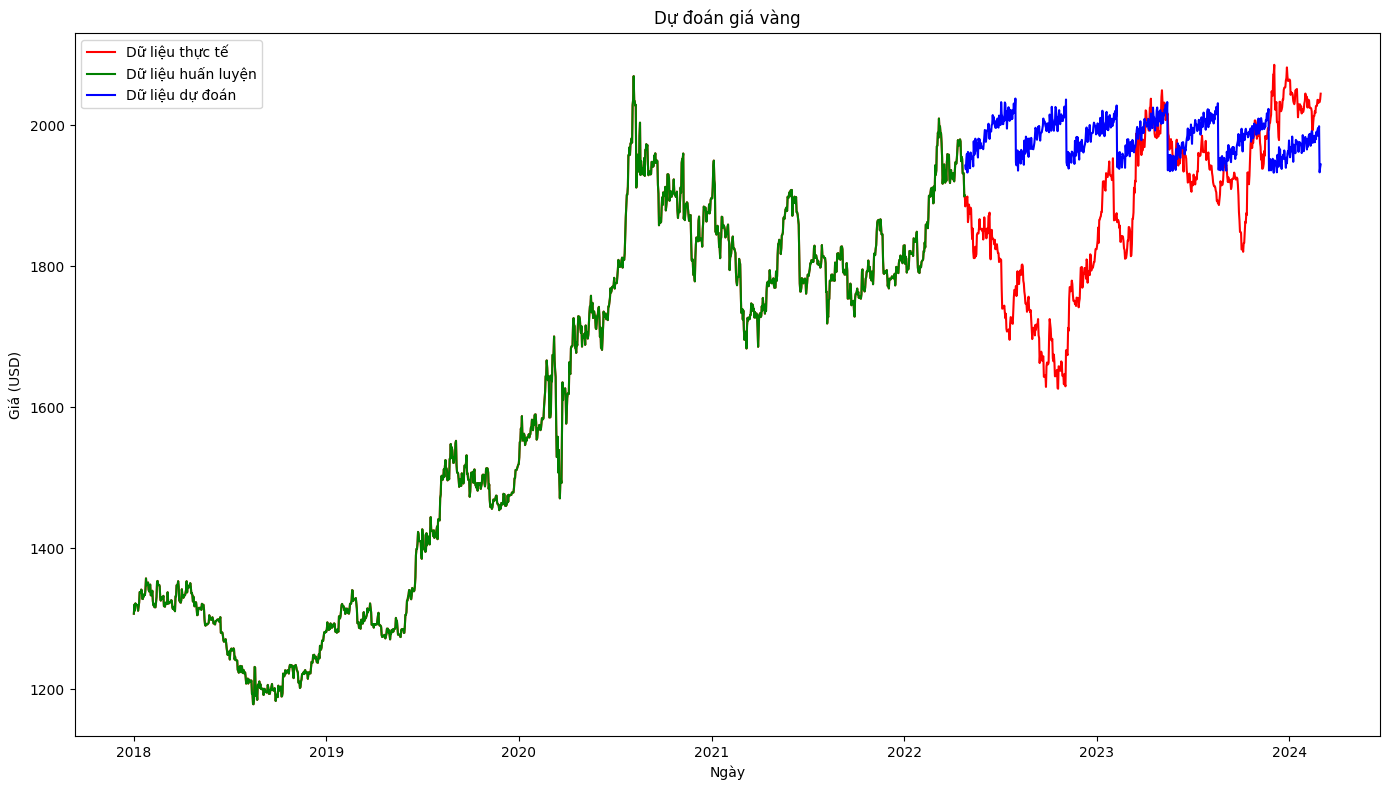

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from transformers import PatchTSTConfig, PatchTSTForPrediction, Trainer, TrainingArguments, EarlyStoppingCallback, DefaultDataCollator
from tsfm_public.toolkit.dataset import ForecastDFDataset
from tsfm_public.toolkit.time_series_preprocessor import TimeSeriesPreprocessor
from tsfm_public.toolkit.util import select_by_index

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

# Định nghĩa hàm tính toán các metric
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }



# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.11458387225866318, 'eval_mse': 2.3901796340942383, 'eval_rmse': 1.5460206270217896, 'eval_mape': 5.472704768180847, 'eval_runtime': 0.1009, 'eval_samples_per_second': 674.19, 'eval_steps_per_second': 19.829}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.834700,0.057424,1.197835,1.094457,3.573286
2,0.580100,0.038364,0.800262,0.894574,3.086717
3,0.443600,0.040305,0.840739,0.916918,3.205097
4,0.373600,0.043473,0.906830,0.952276,3.144350
5,0.320200,0.045719,0.953683,0.976567,3.238859
6,0.284100,0.046459,0.969112,0.984435,3.264627
7,0.267000,0.049510,1.032758,1.016247,3.466878
8,0.242700,0.048097,1.003294,1.001646,3.401585
9,0.228600,0.055736,1.162628,1.078252,3.738379
10,0.204700,0.058252,1.215106,1.102319,3.807531


Test results: {'eval_loss': 0.03836412727832794, 'eval_mse': 0.8002623915672302, 'eval_rmse': 0.8945738673210144, 'eval_mape': 3.086717054247856, 'eval_runtime': 0.0957, 'eval_samples_per_second': 710.417, 'eval_steps_per_second': 20.895, 'epoch': 12.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[23.351229 23.838322 23.471647 23.779259 23.430218 23.369326 23.453655
 23.518618 23.601133 23.993443]


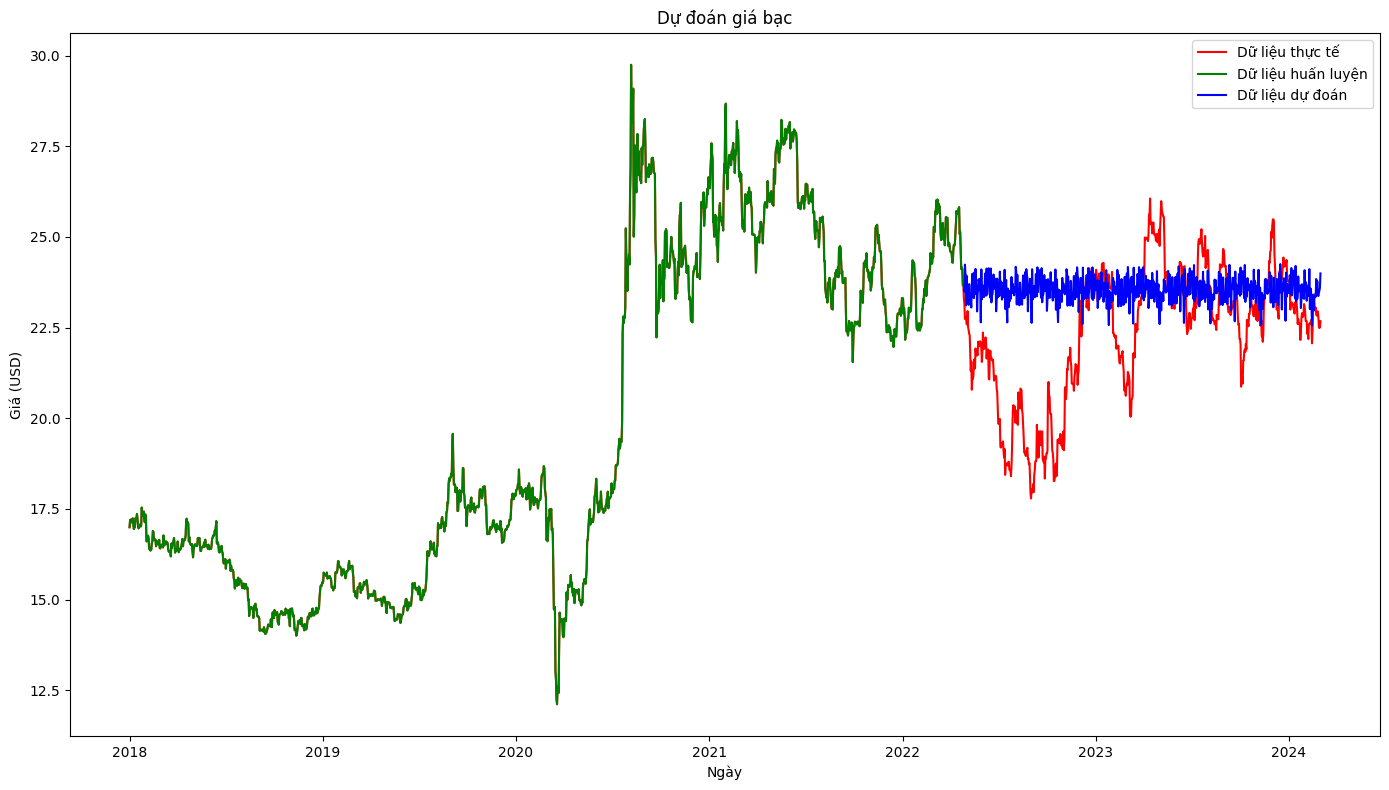

In [6]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 7-3

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.1752433031797409, 'eval_mse': 2565.3134765625, 'eval_rmse': 50.648921966552734, 'eval_mape': 4.736616089940071, 'eval_runtime': 0.0934, 'eval_samples_per_second': 727.743, 'eval_steps_per_second': 21.404}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,1.131300,0.234664,3435.143311,58.610096,5.582507
2,0.851800,0.252469,3695.791260,60.793018,5.797322
3,0.614700,0.163123,2387.888184,48.866024,4.459058
4,0.447600,0.153593,2248.380859,47.417095,4.248006
5,0.361100,0.135108,1977.793213,44.472385,3.964396
6,0.329700,0.129424,1894.583008,43.526810,3.908079
7,0.298300,0.127930,1872.716797,43.274899,3.908601
8,0.276600,0.124575,1823.596680,42.703590,3.873344
9,0.264600,0.123724,1811.149170,42.557598,3.864099
10,0.254100,0.128521,1881.370972,43.374775,3.939451


Test results: {'eval_loss': 0.12372437864542007, 'eval_mse': 1811.149169921875, 'eval_rmse': 42.55759811401367, 'eval_mape': 3.8640987128019333, 'eval_runtime': 0.0933, 'eval_samples_per_second': 729.196, 'eval_steps_per_second': 21.447, 'epoch': 19.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[951.8122  934.99646 947.2379  941.07526 946.4025  941.2935  934.91
 939.2576  946.0045  958.1626 ]


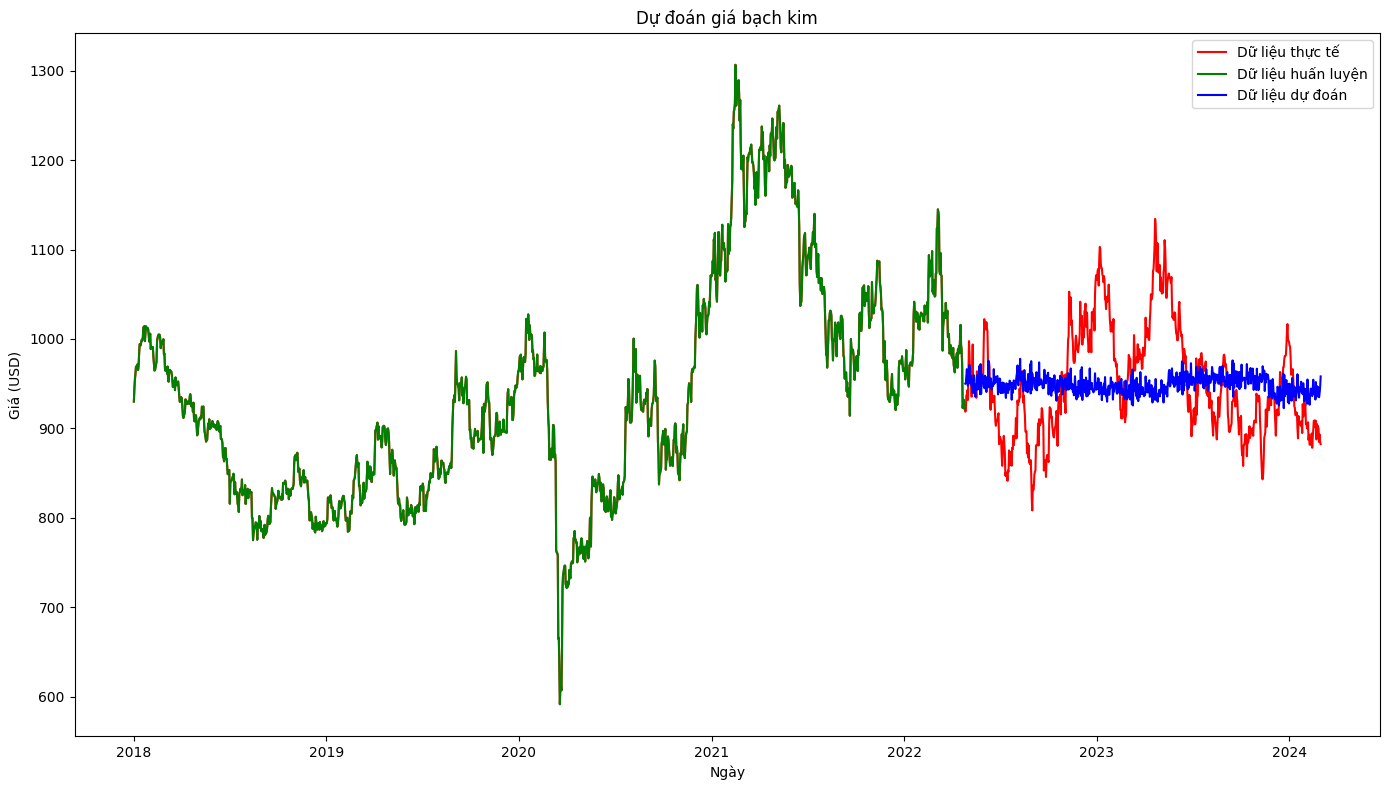

In [7]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.3)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }



# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')


GOLD PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.7045395374298096, 'eval_mse': 43033.46875, 'eval_rmse': 207.44509887695312, 'eval_mape': 10.084972530603409, 'eval_runtime': 0.0275, 'eval_samples_per_second': 36.395, 'eval_steps_per_second': 36.395}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.532700,0.345048,21075.648438,145.174545,6.973816
2,0.304700,0.078853,4816.345703,69.399895,3.117937
3,0.230500,0.089420,5461.771973,73.903801,3.354152
4,0.180400,0.158940,9708.082031,98.529602,4.628433
5,0.151600,0.146971,8977.015625,94.747116,4.439084
6,0.114400,0.017518,1070.001465,32.710876,1.288568
7,0.084300,0.031803,1942.504272,44.073849,1.826120
8,0.076500,0.024122,1473.356812,38.384331,1.623863
9,0.068400,0.040183,2454.376221,49.541660,2.074099
10,0.058000,0.067031,4094.278564,63.986549,2.629926


Test results: {'eval_loss': 0.017517954111099243, 'eval_mse': 1070.00146484375, 'eval_rmse': 32.71087646484375, 'eval_mape': 1.2885679490864277, 'eval_runtime': 0.0192, 'eval_samples_per_second': 51.99, 'eval_steps_per_second': 51.99, 'epoch': 16.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[2066.396  2068.8958 2036.9246 2049.8054 2063.7393 2039.9963 2065.2173
 2060.9194 2056.7153 2078.3674]


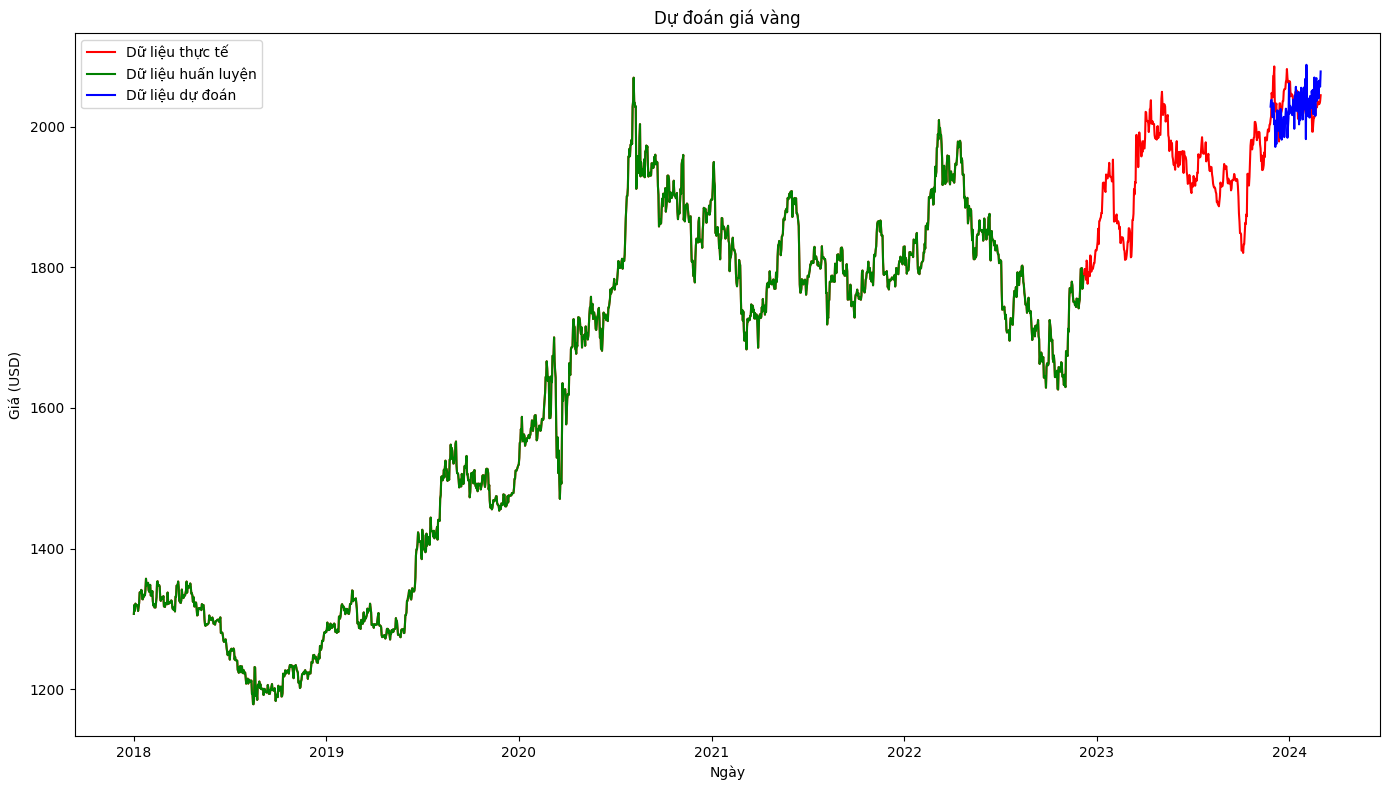

In [8]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.10373101383447647, 'eval_mse': 1.9226969480514526, 'eval_rmse': 1.3866134881973267, 'eval_mape': 4.644669219851494, 'eval_runtime': 0.0131, 'eval_samples_per_second': 76.275, 'eval_steps_per_second': 76.275}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.914800,0.049861,0.924196,0.961351,2.930620
2,0.660700,0.038982,0.722540,0.850024,3.069226
3,0.476900,0.040395,0.748747,0.865302,2.923828
4,0.368500,0.041365,0.766708,0.875619,3.093124
5,0.324000,0.058163,1.078071,1.038302,3.906028
6,0.288700,0.085166,1.578588,1.256419,4.806666
7,0.251900,0.187112,3.468201,1.862311,7.335777
8,0.205400,0.197002,3.651510,1.910892,7.477371
9,0.179500,0.151280,2.804041,1.674527,6.486436
10,0.154200,0.158942,2.946053,1.716407,6.632796


Test results: {'eval_loss': 0.038981612771749496, 'eval_mse': 0.7225401997566223, 'eval_rmse': 0.850023627281189, 'eval_mape': 3.069225884974003, 'eval_runtime': 0.0141, 'eval_samples_per_second': 70.998, 'eval_steps_per_second': 70.998, 'epoch': 12.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[23.76417  23.605488 23.167484 23.567245 23.498993 23.784927 22.894634
 23.501684 23.392052 23.141193]


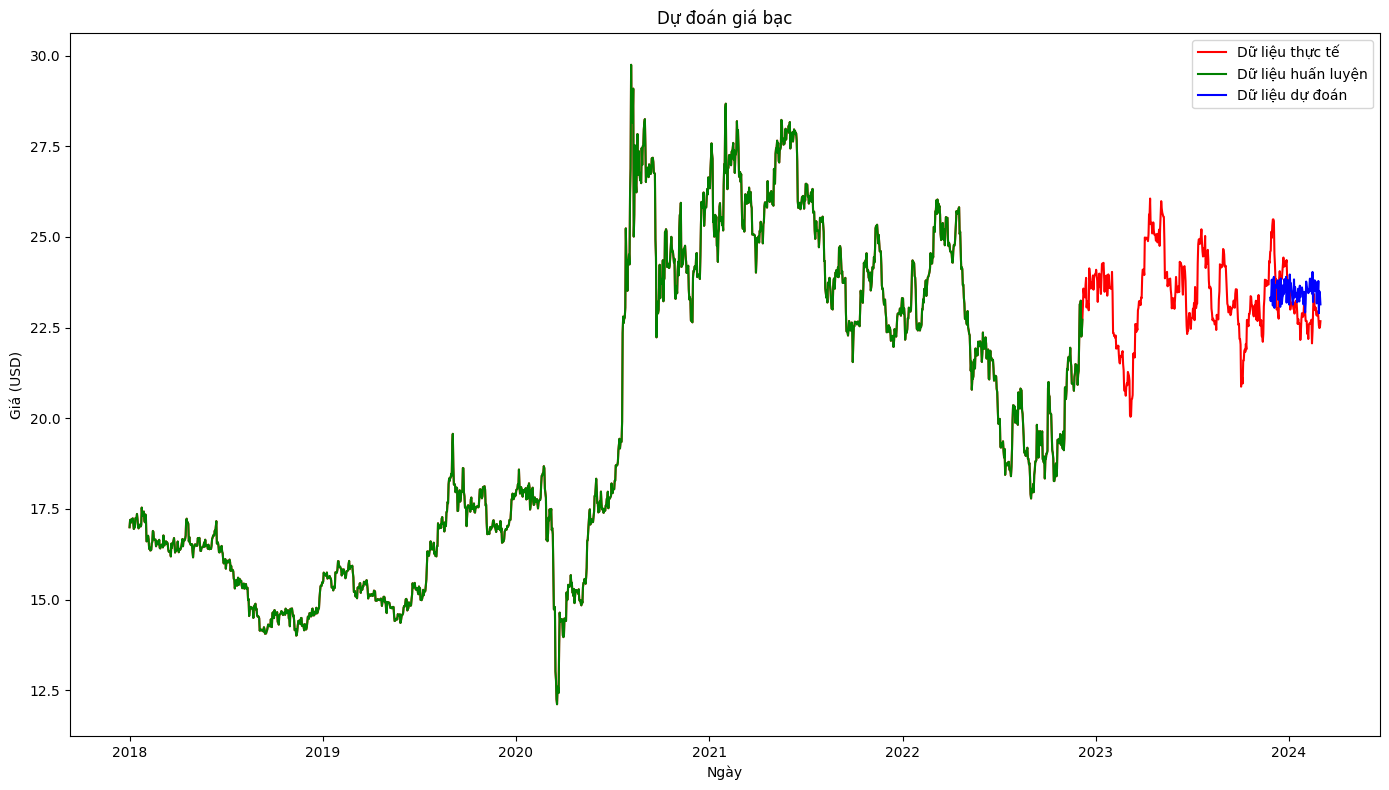

In [10]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 8-2

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.18838971853256226, 'eval_mse': 2477.857421875, 'eval_rmse': 49.778079986572266, 'eval_mape': 4.802839830517769, 'eval_runtime': 0.0212, 'eval_samples_per_second': 47.174, 'eval_steps_per_second': 47.174}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,1.313400,0.211647,2783.754639,52.761299,5.075248
2,1.079100,0.158144,2080.041260,45.607468,4.370682
3,0.858100,0.124174,1633.238403,40.413345,3.694963
4,0.613700,0.123067,1618.681274,40.232838,3.656003
5,0.422000,0.111021,1460.236938,38.213047,3.525277
6,0.342000,0.132417,1741.661743,41.733223,3.928804
7,0.305500,0.128208,1686.296387,41.064541,3.860555
8,0.279500,0.124344,1635.472656,40.440979,3.779697
9,0.262900,0.118804,1562.606079,39.529812,3.682048
10,0.248700,0.147703,1942.717896,44.076275,4.129973


Test results: {'eval_loss': 0.1110207736492157, 'eval_mse': 1460.2369384765625, 'eval_rmse': 38.21304702758789, 'eval_mape': 3.525276854634285, 'eval_runtime': 0.0178, 'eval_samples_per_second': 56.255, 'eval_steps_per_second': 56.255, 'epoch': 15.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[950.13214 935.3345  931.489   951.5699  942.2434  948.7802  928.8553
 948.5445  936.8741  936.83075]


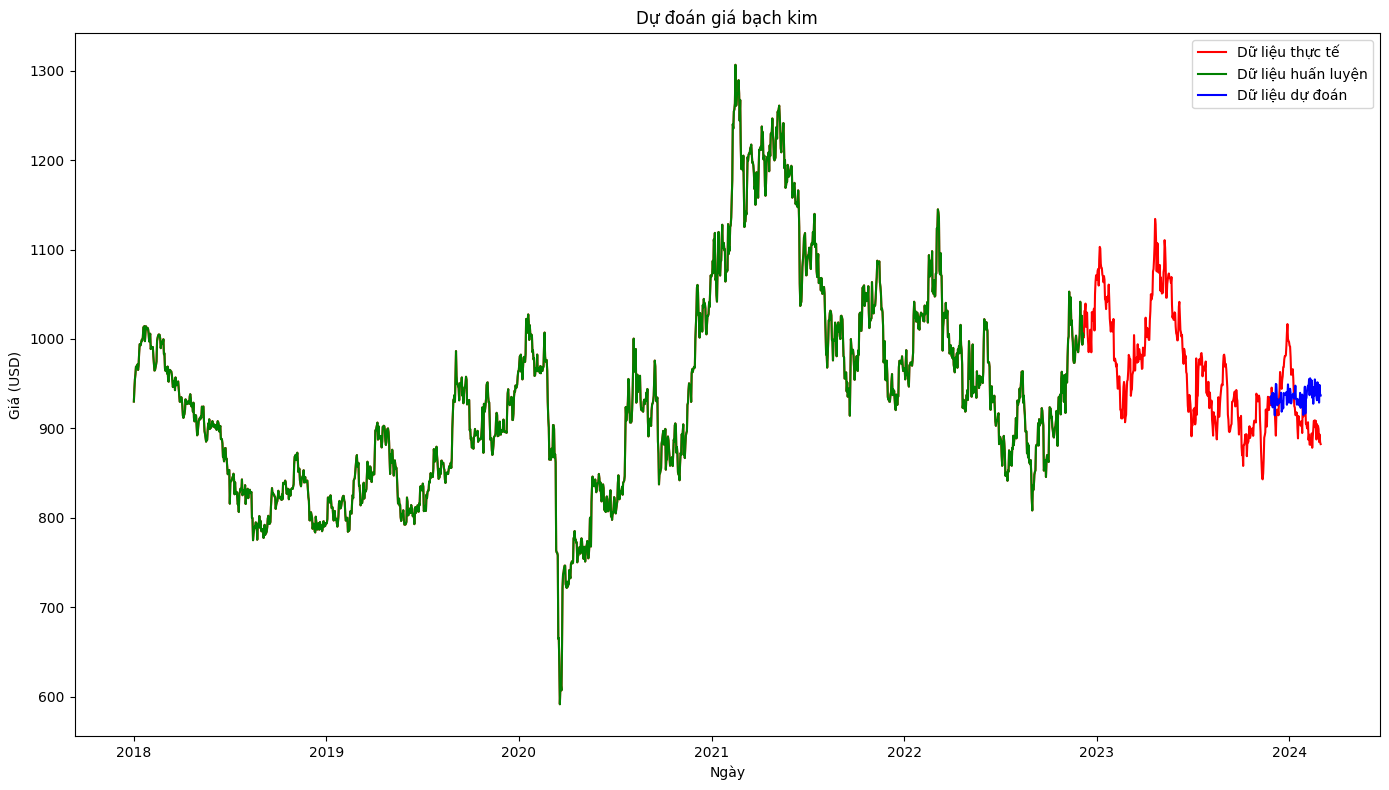

In [11]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.2)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }


# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')


GOLD PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 1.5704163312911987, 'eval_mse': 101640.4609375, 'eval_rmse': 318.8110046386719, 'eval_mape': 15.60186892747879, 'eval_runtime': 0.0159, 'eval_samples_per_second': 62.863, 'eval_steps_per_second': 62.863}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.431000,0.949212,61434.855469,247.860550,12.079153
2,0.248300,0.428181,27712.695312,166.471298,8.056181
3,0.193600,0.120621,7806.847656,88.356369,4.098457
4,0.159200,0.094472,6114.433594,78.194847,3.639891
5,0.125300,0.115750,7491.555176,86.553772,4.065659
6,0.093700,0.130029,8415.764648,91.737480,4.349321
7,0.075300,0.060067,3887.633545,62.350891,2.832572
8,0.065200,0.042561,2754.629639,52.484566,2.283476
9,0.062600,0.020993,1358.736206,36.861038,1.521028
10,0.058100,0.032753,2119.863281,46.041973,1.959564


Test results: {'eval_loss': 0.008021659217774868, 'eval_mse': 519.1778564453125, 'eval_rmse': 22.78547477722168, 'eval_mape': 0.9133405052125454, 'eval_runtime': 0.0128, 'eval_samples_per_second': 78.18, 'eval_steps_per_second': 78.18, 'epoch': 23.0}
Actual Values:
[2026.828726 2027.695482 2027.382641 2035.785444 2035.797877 2031.609404
 2033.313814 2032.65377  2036.199141 2044.59131 ]
Predicted Values:
[2044.556  2025.5116 2020.7198 2045.9917 2043.1266 2054.7026 2053.7627
 2031.9126 2044.9302 2022.8047]


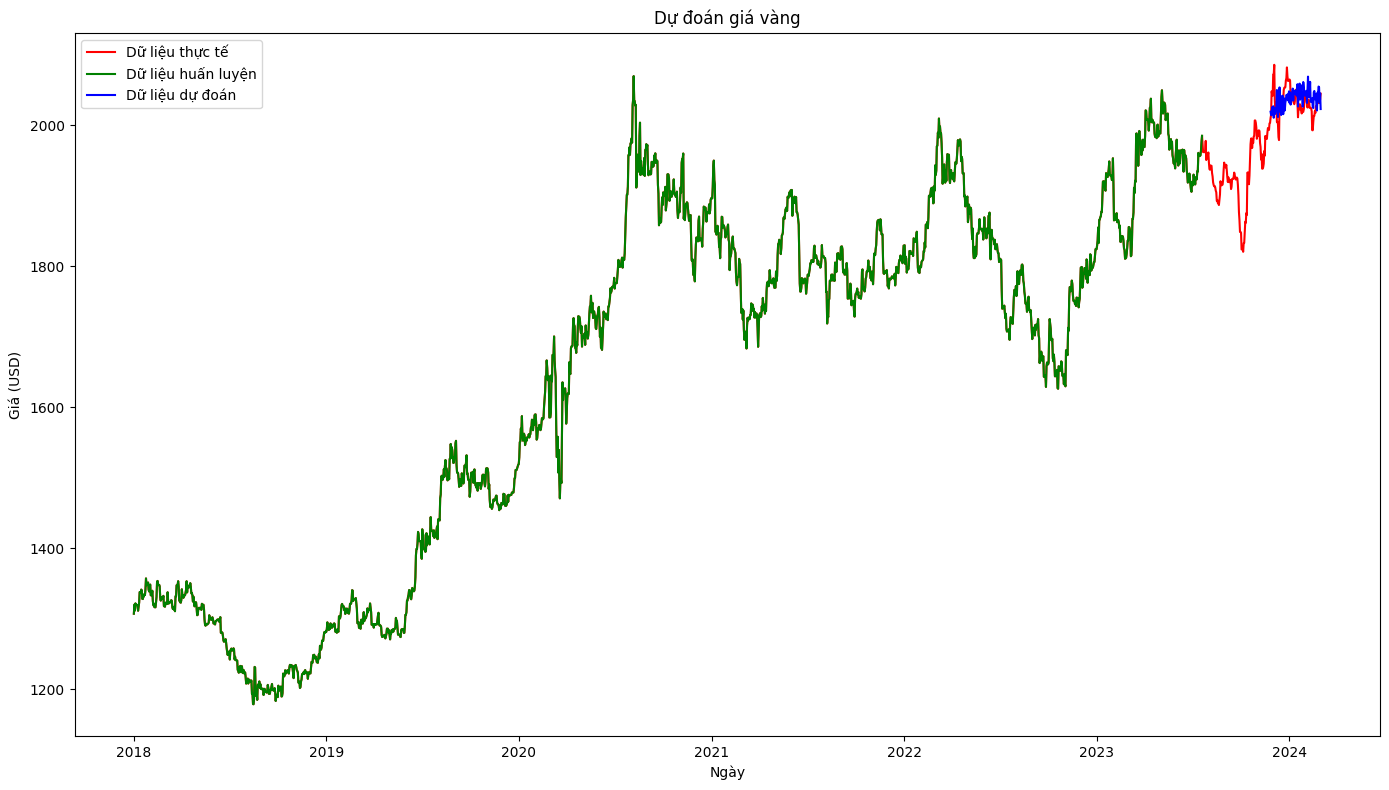

In [12]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gold_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }


# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá vàng')


SILVER PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.3467136323451996, 'eval_mse': 6.227019786834717, 'eval_rmse': 2.4953997135162354, 'eval_mape': 9.976065158843994, 'eval_runtime': 0.0227, 'eval_samples_per_second': 44.013, 'eval_steps_per_second': 44.013}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,0.819100,0.206997,3.717690,1.928131,7.336301
2,0.565000,0.094957,1.705445,1.305927,4.254889
3,0.418600,0.044791,0.804461,0.896917,2.684494
4,0.366700,0.034685,0.622939,0.789265,2.786465
5,0.303800,0.038103,0.684336,0.827246,2.995917
6,0.269500,0.051367,0.922557,0.960498,3.612122
7,0.216400,0.042521,0.763682,0.873889,2.819059
8,0.186500,0.044676,0.802380,0.895757,2.970640
9,0.163100,0.047466,0.852496,0.923307,3.198599
10,0.152900,0.052806,0.948401,0.973859,3.630250


Test results: {'eval_loss': 0.03468454256653786, 'eval_mse': 0.622938871383667, 'eval_rmse': 0.7892647385597229, 'eval_mape': 2.786465175449848, 'eval_runtime': 0.013, 'eval_samples_per_second': 76.758, 'eval_steps_per_second': 76.758, 'epoch': 14.0}
Actual Values:
[23.05342132 22.88090977 22.8300062  22.94640995 22.94715097 22.80071825
 22.55805354 22.48693816 22.5078085  22.67652863]
Predicted Values:
[23.498909 23.176218 23.390112 23.369486 23.399435 23.616505 23.133945
 23.20912  23.388027 23.478764]


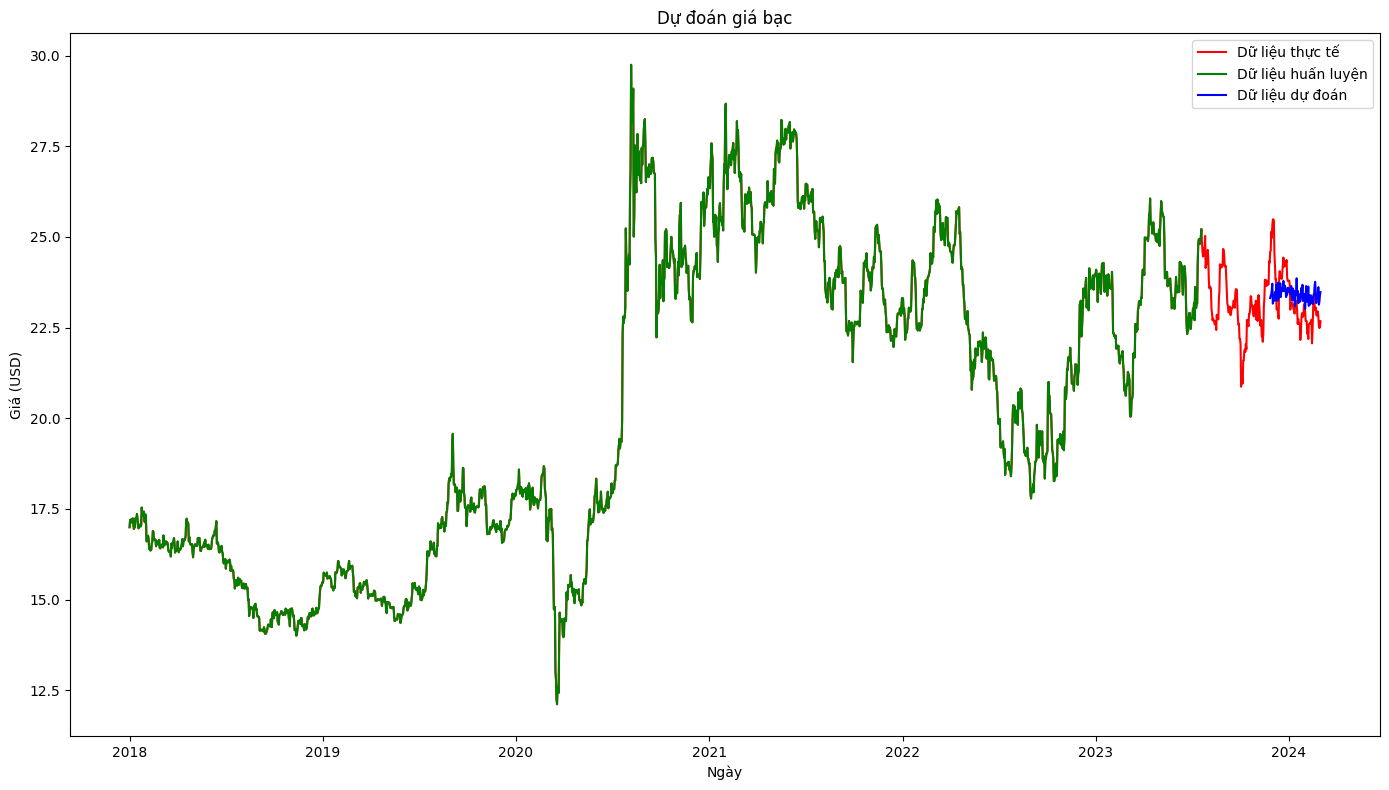

In [13]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/silver_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 7-3
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }

# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạc')


PLATINUM PRICE 9-1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Evaluation metrics: {'eval_loss': 0.10537637025117874, 'eval_mse': 1319.1988525390625, 'eval_rmse': 36.320777893066406, 'eval_mape': 3.3752407878637314, 'eval_runtime': 0.0124, 'eval_samples_per_second': 80.638, 'eval_steps_per_second': 80.638}


Epoch,Training Loss,Validation Loss,Mse,Rmse,Mape
1,1.194800,0.105176,1316.695190,36.286293,3.390699
2,0.946600,0.100607,1259.491333,35.489311,3.188678
3,0.736400,0.102821,1287.212524,35.877743,3.062847
4,0.518400,0.113489,1420.755249,37.692905,3.456289
5,0.379200,0.131055,1640.667358,40.505154,3.783933
6,0.321400,0.131076,1640.931152,40.508408,3.824064
7,0.293100,0.138403,1732.653931,41.625160,3.940636
8,0.271300,0.142815,1787.896851,42.283531,4.024816
9,0.249300,0.121335,1518.984253,38.974148,3.680749
10,0.242200,0.116734,1461.382446,38.228031,3.584501


Test results: {'eval_loss': 0.1006070002913475, 'eval_mse': 1259.4913330078125, 'eval_rmse': 35.48931121826172, 'eval_mape': 3.1886782497167587, 'eval_runtime': 0.0193, 'eval_samples_per_second': 51.88, 'eval_steps_per_second': 51.88, 'epoch': 12.0}
Actual Values:
[908.4157085 887.634602  904.7748861 902.7672706 902.5715527 899.35749
 884.7729252 893.1840323 884.4419149 882.441964 ]
Predicted Values:
[933.63586 934.0775  926.72546 931.6782  934.43866 926.99524 934.6742
 940.56824 929.13885 932.70264]


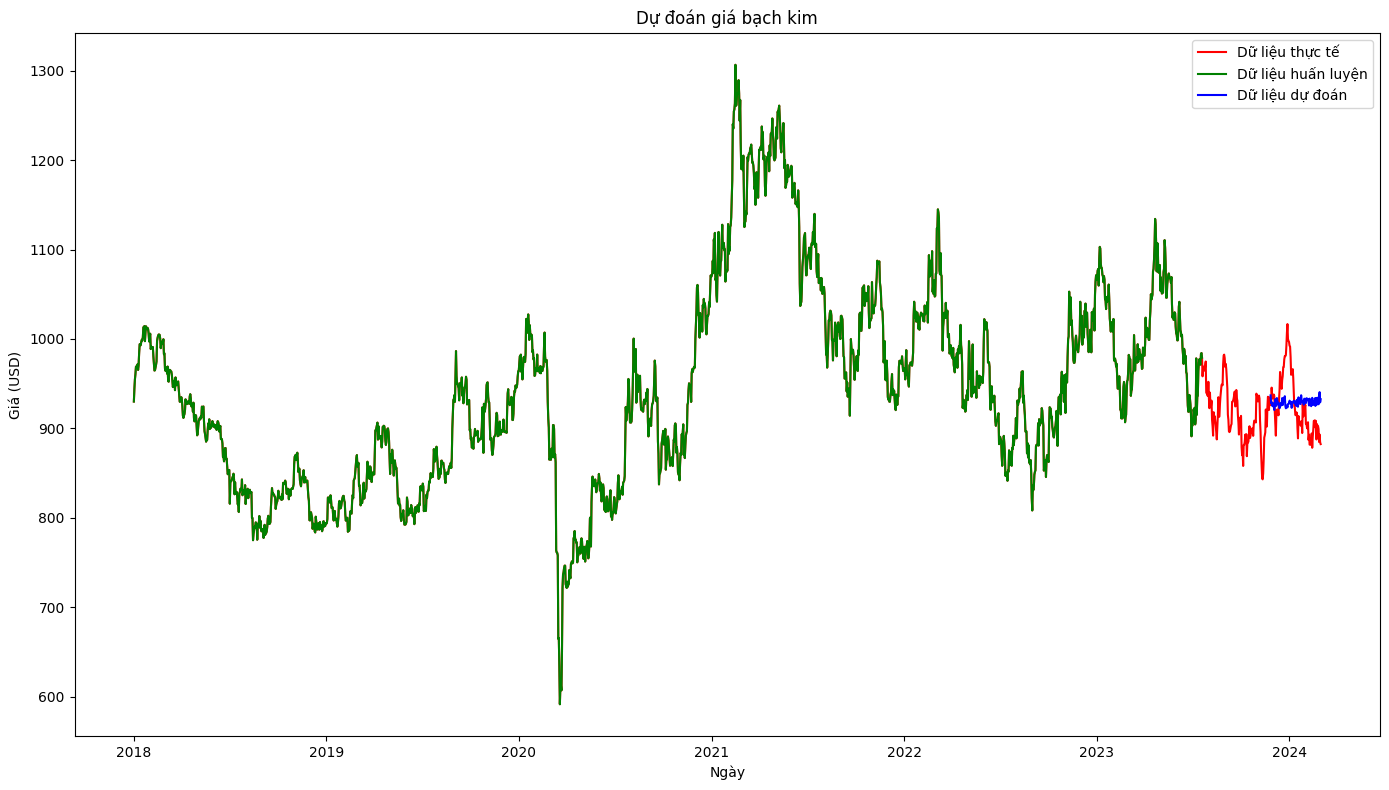

In [14]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/platium_price_2018_2024.csv')

# Chuyển đổi cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])
timestamp_column = 'Date'
forecast_columns = ['Value (USD per troy ounce)']

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 9-1
train_size = int(len(data) * 0.9)
test_size = int(len(data) * 0.1)
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Chuẩn bị scaler riêng để sử dụng
scaler = StandardScaler()

# Fit scaler trên dữ liệu huấn luyện
train_scaled = scaler.fit_transform(train[forecast_columns])
test_scaled = scaler.transform(test[forecast_columns])

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa và giữ lại cột 'Date'
train_scaled_df = pd.DataFrame(train_scaled, columns=forecast_columns, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=forecast_columns, index=test.index)
train_scaled_df['Date'] = train['Date']
test_scaled_df['Date'] = test['Date']

# Chuyển đổi dữ liệu thành định dạng thích hợp cho mô hình PatchTST
context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 0  # Đặt số lượng luồng xử lý thành 0 để tránh multiprocessing
batch_size = 64

# Chuẩn bị dữ liệu sử dụng scaler đã chuẩn hóa
time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=[],
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=False,  # Đã chuẩn hóa bên ngoài
)

train_data = select_by_index(train_scaled_df, start_index=0, end_index=len(train_scaled_df))
test_data = select_by_index(test_scaled_df, start_index=0, end_index=len(test_scaled_df))

time_series_preprocessor = time_series_preprocessor.train(train_data)

train_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(train_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

test_dataset = ForecastDFDataset(
    time_series_preprocessor.preprocess(test_data),
    id_columns=[],
    timestamp_column=timestamp_column,
    target_columns=forecast_columns,
    context_length=context_length,
    prediction_length=forecast_horizon,
)

# Cấu hình mô hình PatchTST
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    if len(predictions.shape) > 2:
        predictions = predictions.reshape(-1, predictions.shape[-1])
    if len(labels.shape) > 2:
        labels = labels.reshape(-1, labels.shape[-1])

    # Unscale predictions and labels
    predictions_unscaled = scaler.inverse_transform(predictions)
    labels_unscaled = scaler.inverse_transform(labels)

    mse = mean_squared_error(labels_unscaled, predictions_unscaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((labels_unscaled - predictions_unscaled) / labels_unscaled)) * 100

    return {
        'mse': mse,
        'rmse': rmse,
        'mape': mape
    }


# Thiết lập các tham số huấn luyện
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/gold_price/output/",
    overwrite_output_dir=True,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,
    early_stopping_threshold=0.0001,
)

# Huấn luyện mô hình
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
)

# In ra metric để kiểm tra
metrics = trainer.evaluate()
print("Evaluation metrics:", metrics)

trainer.train()

# Đánh giá mô hình trên tập kiểm tra
results = trainer.evaluate(test_dataset)
print("Test results:", results)

# Dự đoán bằng cách sử dụng trainer
predicted_output = trainer.predict(test_dataset)
predicted_values = predicted_output.predictions

# Debugging: print the contents of the tuple and shape
# print("Contents of predicted_values tuple:", predicted_values)
# print("Shape of predicted_values[0]:", predicted_values[0].shape)

# Access the first array in the tuple (predictions)
predictions = predicted_values[0]

# Reshape predictions if necessary
if len(predictions.shape) > 2:
    predictions = predictions.reshape(-1, predictions.shape[-1])

# Debugging: check the shape of predictions after reshaping
# print("Shape of predictions after reshaping:", predictions.shape)

# Unscaling predictions to original values using scaler
predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate mean prediction across the forecast horizon if applicable
predictions_mean = predictions_unscaled.mean(axis=1)

# Align the predictions with the test dates
test_dates = test['Date'].iloc[-len(predictions_mean):]

# Debugging: print lengths to ensure alignment
# print("Length of test_dates:", len(test_dates))
# print("Length of predictions_mean:", len(predictions_mean))

# Make sure predictions are aligned with test_dates
if len(predictions_mean) > len(test_dates):
    predictions_mean = predictions_mean[:len(test_dates)]

# Print some actual and predicted values for comparison
print("Actual Values:")
print(test['Value (USD per troy ounce)'].values[-10:])
print("Predicted Values:")
print(predictions_mean[-10:])

# Hàm vẽ biểu đồ kết quả
def plot_results(dates, actual, train, predict, title):
    plt.figure(figsize=(14, 8))
    plt.plot(dates, actual, label='Dữ liệu thực tế', color='red')
    plt.plot(dates[:len(train)], train, label='Dữ liệu huấn luyện', color='green')
    plt.plot(dates[-len(predict):], predict, label='Dữ liệu dự đoán', color='blue')
    plt.title(title)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ kết quả
plot_results(data['Date'], data['Value (USD per troy ounce)'], train['Value (USD per troy ounce)'], predictions_mean, 'Dự đoán giá bạch kim')
